# Week 03: Generative Art Examples and Matplotlib Time-Series
This notebook explains the generative art Python scripts in this week's folder and adds a short gallery of Matplotlib time-series examples useful for plotting temporal data (e.g., tidal measurements).

## Time-Series Examples Overview
We'll demonstrate a few common plotting patterns with Matplotlib: a basic line plot, multi-series plot, rolling average smoothing, and a monthly aggregated bar chart. These are useful when visualizing tidal or other temporal data.

In [2]:
!pip install matplotlib numpy pandas

/var/folders/8n/5wjxyzss1q5fm16jt8tl61l40000gn/T/ipykernel_77460/1829900227.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rng = pd.date_range(end=pd.Timestamp.today().normalize(), periods=200, freq='6H')


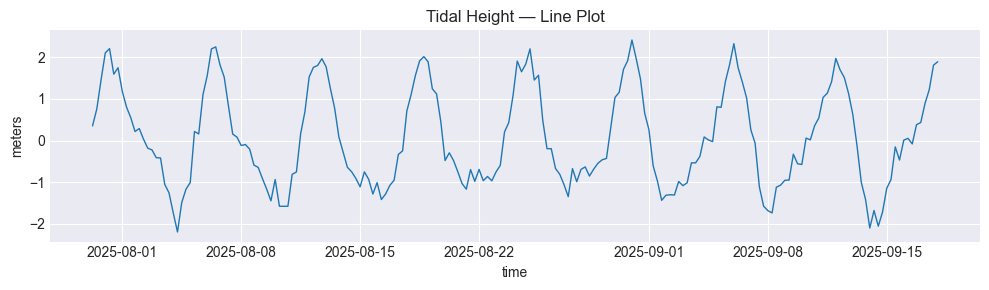

In [17]:
# Example dependencies: pandas and matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Make results reproducible and set a style for all plots
np.random.seed(0)
plt.style.use('seaborn-v0_8-darkgrid')

# Create a time index and synthetic tidal-like data
rng = pd.date_range(end=pd.Timestamp.today().normalize(), periods=200, freq='6H')
# synthetic tide heights with two tidal components + noise
t = np.arange(len(rng))
data = 1.5 * np.sin(2 * np.pi * t / 24) + 0.6 * np.sin(2 * np.pi * t / 12.4) + 0.2 * np.random.randn(len(t))
df = pd.DataFrame({'height': data}, index=rng)

# Basic line plot: tidy labels and consistent figure size
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(df.index, df['height'], color='tab:blue', linewidth=1)
ax.set_title('Tidal Height — Line Plot')
ax.set_xlabel('time')
ax.set_ylabel('meters')
plt.tight_layout()
plt.show()

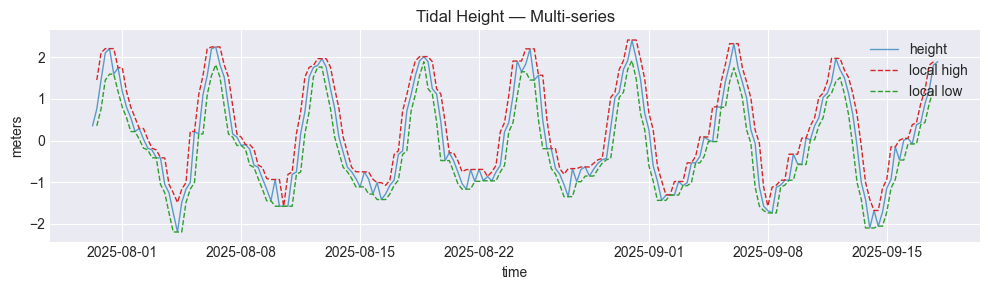

In [20]:
# Multi-series with local high/low computed with a small rolling window
# keep comments short and consistent across examples
df['high'] = df['height'].rolling(3, center=True).max()
df['low'] = df['height'].rolling(3, center=True).min()
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(df.index, df['height'], label='height', color='tab:blue', alpha=0.7, linewidth=1)
ax.plot(df.index, df['high'], label='local high', color='tab:red', linestyle='--', linewidth=1)
ax.plot(df.index, df['low'], label='local low', color='tab:green', linestyle='--', linewidth=1)
ax.legend(loc='upper right')
ax.set_title('Tidal Height — Multi-series')
ax.set_xlabel('time')
ax.set_ylabel('meters')
plt.tight_layout()
plt.show()

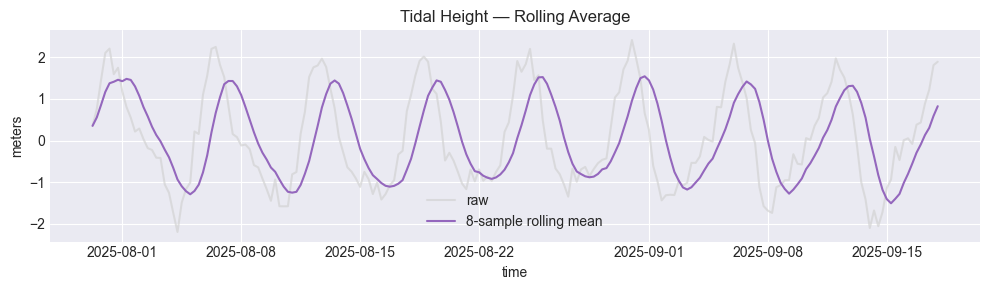

In [5]:
# Rolling average smoothing and plot (8-sample window)
df['rolling_mean'] = df['height'].rolling(window=8, min_periods=1).mean()
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(df.index, df['height'], color='lightgray', label='raw', alpha=0.7)
ax.plot(df.index, df['rolling_mean'], color='tab:purple', label='8-sample rolling mean', linewidth=1.5)
ax.set_title('Tidal Height — Rolling Average')
ax.set_xlabel('time')
ax.set_ylabel('meters')
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/8n/5wjxyzss1q5fm16jt8tl61l40000gn/T/ipykernel_77460/511158141.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df['height'].resample('M').mean()


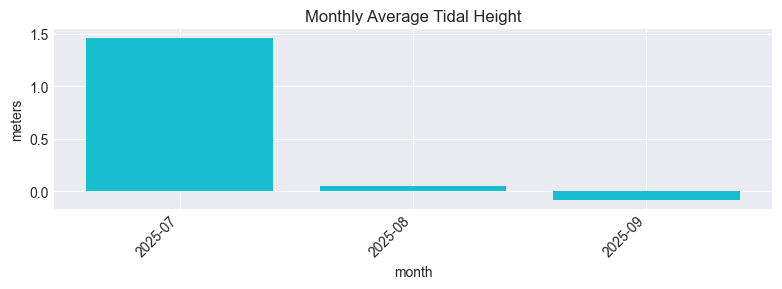

In [6]:
# Monthly aggregated bar chart (example aggregation)
# resample to month-end and compute mean height
df_month = df['height'].resample('M').mean()
fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(df_month.index.strftime('%Y-%m'), df_month.values, color='tab:cyan')
ax.set_title('Monthly Average Tidal Height')
ax.set_xlabel('month')
ax.set_ylabel('meters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 1. Koch Curve (koch_curve.py)
This script generates the Koch snowflake fractal using recursion and complex numbers. It uses Matplotlib to plot the result. The recursion depth controls the fractal's detail.

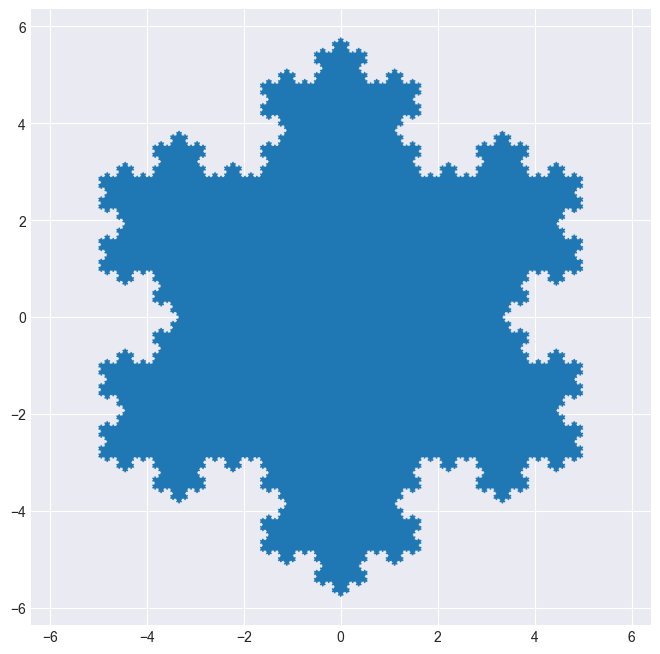

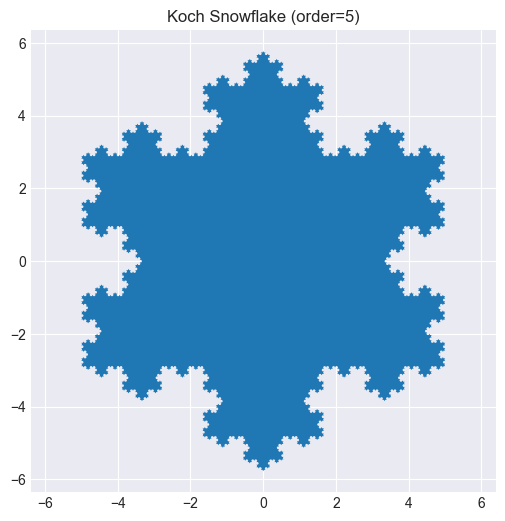

In [7]:
from koch_curve import koch_snowflake
import matplotlib.pyplot as plt
x, y = koch_snowflake(order=5)
plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.fill(x, y)
plt.title('Koch Snowflake (order=5)')
plt.show()

## 2. Mandelbrot Set (mandelbrot.py)
This script visualizes the Mandelbrot set, a famous fractal, by iterating over complex numbers and plotting the escape time. The display function shows the fractal using Matplotlib.

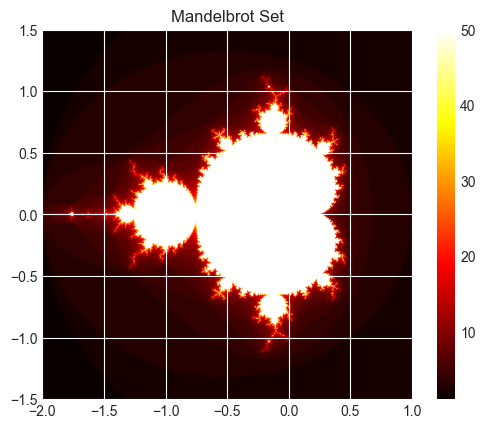

In [23]:
from mandelbrot import display
display(-2.0, 1.0, -1.5, 1.5, 600, 600, 50)

## 3. Sierpinski Triangle Animation (sierpinksi_matplot_animation.py)
This script animates the Sierpinski triangle using Matplotlib's animation tools. It repeatedly plots points halfway between the current position and a random triangle vertex, creating the fractal pattern.

In [9]:
# To run the animation, execute the script directly from the command line:
# !python sierpinksi_matplot_animation.py

## 4. Simple Animation (simple_animation.py)
This script animates a circle and a rotating square using Matplotlib. The circle's radius and color change over time, and the square rotates.

In [10]:
# To run the animation, execute the script directly from the command line:
# !python simple_animation.py

## 5. Sine Animation (sine_animation.py)
This script animates sine and cosine curves, with lines fading in and out to create a dynamic effect.

In [11]:
# To run the animation, execute the script directly from the command line:
# !python sine_animation.py

## 6. Tkinter Animation (tkinter_animation.py)
This script uses Tkinter to render a Sierpinski fractal in a GUI window. It draws points recursively on a canvas. **Note:** Tkinter scripts must be run from the command line, not in a notebook.

**How to launch from command line:**

```bash
python tkinter_animation.py
```

This will open a window displaying the animation.